## Mini Projeto 01 - Curso DSA Academy

Mini projeto qe tem por objetivo responder as seguintes perguntas utilizando Python, SQl e Banco de Dados Sqlite.Os dados reais sobres Filmes IMDB

Perguntas:
1- Quais São as Categorias de Filmes Mais Comuns no IMDB?
2- Qual o Número de Títulos Por Gênero?
3- Qual a Mediana de Avaliação dos Filmes Por Gênero?
4- Qual a Mediana de Avaliação dos Filmes Em Relação ao Ano de Estréia?
5- Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?
6- Qual o Filme Com Maior Tempo de Duração? Calcule os Percentis.
7- Qual a Relação Entre Duração e Gênero?
8- Qual o Número de Filmes Produzidos Por País?
9- Quais São os Top 10 Melhores Filmes?
10- Quais São os Top 10 Piores Filmes?

In [1]:
# Instala o pacote a ser usado no projeto
! pip install -q imdb-sqlite

In [2]:
# Instala o pacote pycountry (informacao de paises)
!pip install -q pycountry

In [3]:
# imports
import re
import time
import sqlite3
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid") # tema dos graficos

Baixando os dados de estudo

In [4]:
%%time
!imdb-sqlite

2022-12-16 18:17:11,155 GET https://datasets.imdbws.com/name.basics.tsv.gz -> downloads/name.basics.tsv.gz
2022-12-16 18:17:24,472 GET https://datasets.imdbws.com/title.basics.tsv.gz -> downloads/title.basics.tsv.gz
2022-12-16 18:17:33,874 GET https://datasets.imdbws.com/title.akas.tsv.gz -> downloads/title.akas.tsv.gz
2022-12-16 18:17:47,722 GET https://datasets.imdbws.com/title.principals.tsv.gz -> downloads/title.principals.tsv.gz
2022-12-16 18:18:07,537 GET https://datasets.imdbws.com/title.episode.tsv.gz -> downloads/title.episode.tsv.gz
2022-12-16 18:18:10,925 GET https://datasets.imdbws.com/title.ratings.tsv.gz -> downloads/title.ratings.tsv.gz
2022-12-16 18:18:11,385 Populating database: imdb.db
2022-12-16 18:18:11,472 Applying schema
2022-12-16 18:18:11,559 Importing file: downloads/name.basics.tsv.gz
2022-12-16 18:18:11,559 Reading number of rows ...
2022-12-16 18:18:38,437 Inserting rows into table: people
100%|█████████████████████████| 12150956/12150956 [02:14<00:00, 90618

In [6]:
# Criando a conexao
conn = sqlite3.connect("imdb.db")

In [8]:
# Extraindo os nomes das tabelas para um DF
tabelas = pd.read_sql_query("select name as 'table_name' \
                            from sqlite_master where type = 'table'", conn)
type(tabelas)

pandas.core.frame.DataFrame

In [9]:
# Vizualizando o resultado do DF
tabelas.head()

,table_name
0,people
1,titles
2,akas
3,crew
4,episodes


In [11]:
# Convertendo o DF em lista
tabelas = tabelas["table_name"].values.tolist()

In [12]:
# Loop for para extrair o esquema de cada tabela do banco de dados
for tabela in tabelas:
    consulta = "PRAGMA TABLE_INFO({})".format(tabela)
    resultado = pd.read_sql_query(consulta, conn)
    print("Esquema da tabela", tabela)
    display(resultado)
    print("-"*100)
    print("\n")

Esquema da tabela people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




# 1 - Quais sao as categorias de filmes mais comuns no IMDB?

In [14]:
# criando a consulta sql para o problema
con1 = '''select type, count(*) as count from titles \
             group by type'''
# Extraindo o resultado
resul1 = pd.read_sql_query(con1, conn)

In [15]:
# Vizualizando o resultado
display(resul1)

,type,count
0,movie,629740
1,short,904285
2,tvEpisode,7143782
3,tvMiniSeries,46379
4,tvMovie,138680
5,tvPilot,2
6,tvSeries,235641
7,tvShort,10772
8,tvSpecial,39606
9,video,268437


In [18]:
# Calculando o percentual para cada tipo
resul1['percentual'] = (resul1['count'] / resul1['count'].sum()) * 100
# Vizualiando o resulado em porcentagem
display(resul1)

,type,count,percentual
0,movie,629740,6.663619
1,short,904285,9.568728
2,tvEpisode,7143782,75.592217
3,tvMiniSeries,46379,0.490761
4,tvMovie,138680,1.467448
5,tvPilot,2,0.000021
6,tvSeries,235641,2.493445
7,tvShort,10772,0.113984
8,tvSpecial,39606,0.419092
9,video,268437,2.840477


In [22]:
# Criando um grafico com apenas 4 categorias
# as 3 categorias com mais titulos e 1 categoria com o restante

others = {}
# filtrando o percentual em 5% e somando o total
others['count'] = resul1[resul1['percentual'] < 5]['count'].sum()
# Gravando o percentual
others['percentual'] =resul1[resul1['percentual'] < 5]['percentual'].sum()
# Ajustando o nome
others['type'] = 'others'

In [23]:
# Vizualizando o resultado em dicionario
others

{'count': 772613, 'percentual': 8.175435589106094, 'type': 'others'}

In [25]:
# Filtrando o dataframe de resultado
resul1 = resul1[resul1['percentual'] > 5]
# adcionado o resultado das outras categorias
resul1 = resul1.append(others, ignore_index = True)
# ordenando o resultado
resul1 = resul1.sort_values(by = 'count', ascending = False)

In [26]:
# Vizualizando o resultado
resul1.head()

,type,count,percentual
2,tvEpisode,7143782,75.592217
1,short,904285,9.568728
3,others,772613,8.175436
0,movie,629740,6.663619


In [29]:
# Ajustando os labels
labels = [str(resul1['type'][i])+' \
'+'['+str(round(resul1['percentual'][i],2)) +'%'+']' \
          for i in resul1.index]

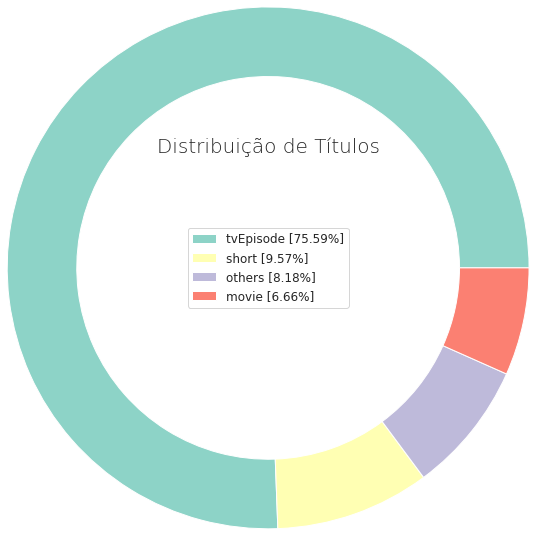

In [31]:
# Plot

# Mapa de cores
cs = cm.Set3(np.arange(100))

# Cria a figura
f = plt.figure()

# Pie Plot
plt.pie(resul1['count'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Distribuição de Títulos", loc = 'Center', fontdict = {'fontsize':20,'fontweight':20})
plt.show()

# 2 - Qual o numero de titulo por genero?

In [33]:
# Criando a consulta SQl
con2 = '''select genres, count(*) as count from titles where \
        type = 'movie' group by genres'''
# Resultado da consulta
resul2 = pd.read_sql_query(con2, conn)
# Vizualizando o resultado
display(resul2)

,genres,count
0,Action,14342
1,"Action,Adult",11
2,"Action,Adult,Adventure",2
3,"Action,Adult,Comedy",5
4,"Action,Adult,Crime",10
...,...,...
1466,"Thriller,Western",42
1467,War,1314
1468,"War,Western",15
1469,Western,5133


In [34]:
# Convertendo as strings para minusculo
resul2['genres'] = resul2['genres'].str.lower().values
# Removendo os valores nulos
temp = resul2['genres'].dropna()

In [35]:
# Criando um vetor usando expressao regular para filtrar as strings
padrao = '(?u)\\b[\\w-]+\\b'
vetor = CountVectorizer(token_pattern = padrao, analyzer = 'word').fit(temp)
type(vetor)

sklearn.feature_extraction.text.CountVectorizer

In [41]:
# Aplicando a vetoracao ao dataset
bag_generos = vetor.transform(temp)
# Retornando generos unicos
generos_unicos = vetor.get_feature_names()
# Criando o DF de generos
generos = pd.DataFrame(bag_generos.todense(),
                      columns = generos_unicos, index = temp.index)
# Vizualizando
generos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1471 entries, 0 to 1470
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   action        1471 non-null   int64
 1   adult         1471 non-null   int64
 2   adventure     1471 non-null   int64
 3   animation     1471 non-null   int64
 4   biography     1471 non-null   int64
 5   comedy        1471 non-null   int64
 6   crime         1471 non-null   int64
 7   documentary   1471 non-null   int64
 8   drama         1471 non-null   int64
 9   experimental  1471 non-null   int64
 10  family        1471 non-null   int64
 11  fantasy       1471 non-null   int64
 12  film-noir     1471 non-null   int64
 13  game-show     1471 non-null   int64
 14  history       1471 non-null   int64
 15  horror        1471 non-null   int64
 16  music         1471 non-null   int64
 17  musical       1471 non-null   int64
 18  mystery       1471 non-null   int64
 19  n             1471 non-null

In [42]:
# Dropando a coluna N
generos = generos.drop(columns = 'n', axis = 0)

In [44]:
# Calculando o percentual
percentual = 100 * pd.Series(generos.sum()).sort_values(
    ascending = False) / generos.shape[0]
# Vizualizando
percentual.head(10)

drama          17.878994
comedy         16.859279
documentary    15.907546
adventure      14.547927
action         14.411965
romance        13.256288
crime          13.120326
mystery        12.372536
thriller       12.304555
fantasy        12.236574
dtype: float64

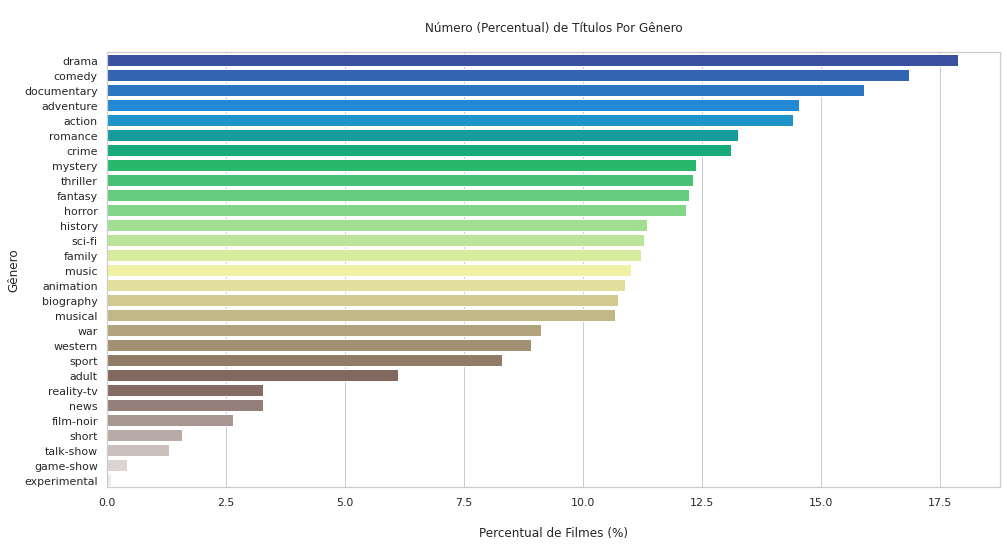

In [46]:
# Plot
plt.figure(figsize = (16,8))
sns.barplot(x = percentual.values, y = percentual.index, orient = "h", palette = "terrain")
plt.ylabel('Gênero')             
plt.xlabel("\nPercentual de Filmes (%)")
plt.title('\nNúmero (Percentual) de Títulos Por Gênero\n')
plt.show()

# 3 - Qual a mediana de avaliacao dos filmes por genero?

In [83]:
# Criando a consulta
consulta3 = '''
            SELECT rating, genres FROM 
            ratings JOIN titles ON ratings.title_id = titles.title_id 
            WHERE premiered <= 2022 AND type = 'movie'
            ''' 
# Resultado
resultado3 = pd.read_sql_query(consulta3, conn)
# Vizualizando
display(resultado3)

,rating,genres
0,5.3,Romance
1,5.2,"Documentary,News,Sport"
2,4.2,\N
3,6.0,"Action,Adventure,Biography"
4,4.4,Drama
...,...,...
284202,5.8,Thriller
284203,6.4,"Drama,History"
284204,3.8,"Adventure,History,War"
284205,8.3,Drama


In [84]:
# Criando uma função para retornar os genêros
def retorna_generos(df):
    df['genres'] = df['genres'].str.lower().values
    temp = df['genres'].dropna()
    vetor = CountVectorizer(token_pattern = '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp)
    generos_unicos =  vetor.get_feature_names()
    generos_unicos = [genre for genre in generos_unicos if len(genre) > 1]
    return generos_unicos

In [85]:
# Aplica a função
generos_unicos = retorna_generos(resultado3)
# Vizualizando
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [86]:
# Criando listas vazias
genero_counts = []
genero_ratings = []
# Loop
for item in generos_unicos:
    
    # Retornando a contagem de filmes por gênero
    consulta = 'SELECT COUNT(rating) FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_counts.append(resultado.values[0][0])
  
     # Retornando a avaliação de filmes por gênero
    consulta = 'SELECT rating FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_ratings.append(np.median(resultado['rating']))

In [91]:
# Prepara o dataframe final
df_genero_ratings = pd.DataFrame()
df_genero_ratings['genres'] = generos_unicos
df_genero_ratings['count'] = genero_counts
df_genero_ratings['rating'] = genero_ratings

In [92]:
# Vizualizando 
df_genero_ratings.head(30)

,genres,count,rating
0,action,29455,5.8
1,adult,4173,5.7
2,adventure,17878,6.0
3,animation,4909,6.6
4,biography,8778,7.0
5,comedy,70292,6.0
6,crime,24601,6.1
7,documentary,43299,7.3
8,drama,126299,6.4
9,family,10987,6.3


In [95]:
# Removendo o o indice 18
# df_genero_ratings = df_genero_ratings.drop(index = 18)
# Ordenando o resultado 
df_genero_ratings = df_genero_ratings.sort_values(by = 'rating',
                                                  ascending= False)
# Vizualizando
display(df_genero_ratings)

,genres,count,rating
12,game-show,1,8.9
7,documentary,43299,7.3
22,short,21,7.2
4,biography,8778,7.0
13,history,7855,6.9
19,reality-tv,47,6.9
23,sport,3474,6.7
26,war,5991,6.6
3,animation,4909,6.6
15,music,13425,6.5


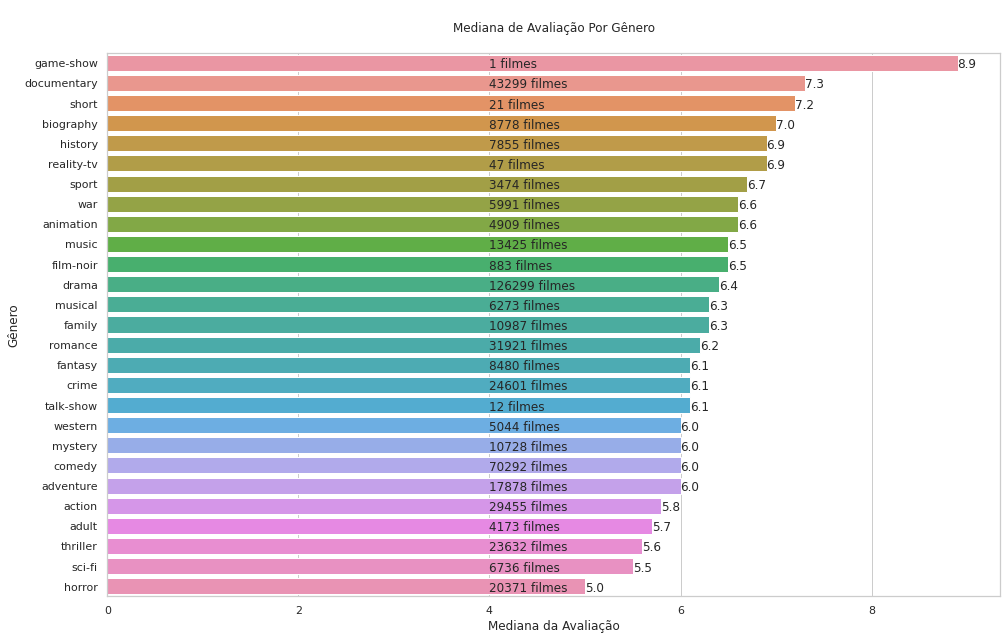

In [96]:


# Plot

# Figura
plt.figure(figsize = (16,10))

# Barplot
sns.barplot(y = df_genero_ratings.genres, x = df_genero_ratings.rating, orient = "h")

# Textos do gráfico
for i in range(len(df_genero_ratings.index)):
    
    plt.text(4.0, 
             i + 0.25, 
             str(df_genero_ratings['count'][df_genero_ratings.index[i]]) + " filmes")
    
    plt.text(df_genero_ratings.rating[df_genero_ratings.index[i]],
             i + 0.25,
             round(df_genero_ratings["rating"][df_genero_ratings.index[i]],2))

plt.ylabel('Gênero')             
plt.xlabel('Mediana da Avaliação')
plt.title('\nMediana de Avaliação Por Gênero\n')
plt.show()